<a href="https://colab.research.google.com/github/seihoon/workeraction/blob/main/workeraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: 현재 디렉토리에 있는 작업자의 3가지 행동(stop, walk, run)에 대한 csv 센서 데이터 파일을 읽어서, 하나의 파일로 만들어, workeraction.csv 파일로 만드는 코드를 작성해주세요.

import pandas as pd
import glob
import os

# Define the names of the three specific files
file_stop = 'stop.csv'
file_walk = 'walk.csv'
file_run = 'run.csv'

# Initialize an empty list to store dataframes
df_list = []

# List of files to attempt to read
files_to_read = [file_stop, file_walk, file_run]

# Read each specific CSV file if it exists and append its dataframe to the list
for file in files_to_read:
    if os.path.exists(file):
        try:
            df = pd.read_csv(file)
            df_list.append(df)
            print(f"Successfully read {file}")
        except Exception as e:
            print(f"Error reading {file}: {e}")
    else:
        print(f"File not found: {file}")

# Check if any dataframes were read
if not df_list:
    print("No dataframes were successfully read from the specified files. Cannot concatenate.")
else:
    # Concatenate all dataframes into a single dataframe
    # pd.concat requires at least one dataframe in the list
    combined_df = pd.concat(df_list, ignore_index=True)

    # Save the combined dataframe to a new CSV file
    combined_df.to_csv('workeraction.csv', index=False)

    print("Combined data saved to workeraction.csv")

print("\nFiles in current directory:")
print(os.listdir('.'))

Successfully read stop.csv
Successfully read walk.csv
Successfully read run.csv
Combined data saved to workeraction.csv

Files in current directory:
['.config', 'walk.csv', 'run.csv', 'workeraction.csv', 'stop.csv', 'sample_data']


# Task
작업자 3가지 행동에 대한 데이터셋임. 이 데이터셋으로 분석할 수 있는 내용은 무엇인 있는가

Here is all the data you need:
"workeraction.csv"

## Data loading

### Subtask:
Load the "workeraction.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "workeraction.csv" file into a pandas DataFrame and display its first few rows.



In [ ]:
import pandas as pd
try:
    df = pd.read_csv('workeraction.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'workeraction.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse 'workeraction.csv'. Check file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,time,x,y,z,Absolute,label
0,0.0133,0.0195,0.0478,0.0740,0.0903,stop
1,0.0213,0.0913,0.1110,0.0905,0.1700,stop
2,0.0293,0.1540,0.1530,0.1390,0.2580,stop
3,0.0373,0.1950,0.1490,0.1380,0.2810,stop
4,0.0453,0.1900,0.1340,0.1580,0.2810,stop


## Data exploration

### Subtask:
Explore and understand the loaded worker action data.


**Reasoning**:
Explore the data by examining its shape, data types, descriptive statistics, and distributions of numerical and categorical features.  Check for missing values and potential outliers.



Shape of the DataFrame: (14819, 6)

Data Types:
 time        float64
x           float64
y           float64
z           float64
Absolute    float64
label        object
dtype: object

Missing Values:
 time        0
x           0
y           0
z           0
Absolute    0
label       0
dtype: int64

Descriptive Statistics for Numerical Columns:
                   x             y             z          time
count  14819.000000  14819.000000  14819.000000  14819.000000
mean       3.063220     -1.671969      1.039996     20.219909
std        9.605944     10.976693      7.164227     12.116177
min      -25.100000    -46.500000    -35.900000      0.009270
25%       -0.362500     -4.160000     -0.566000      9.890000
50%        0.134000     -0.055800      0.107000     19.800000
75%        4.275000      0.732500      3.550000     29.600000
max       57.600000     41.500000     42.200000     45.100000


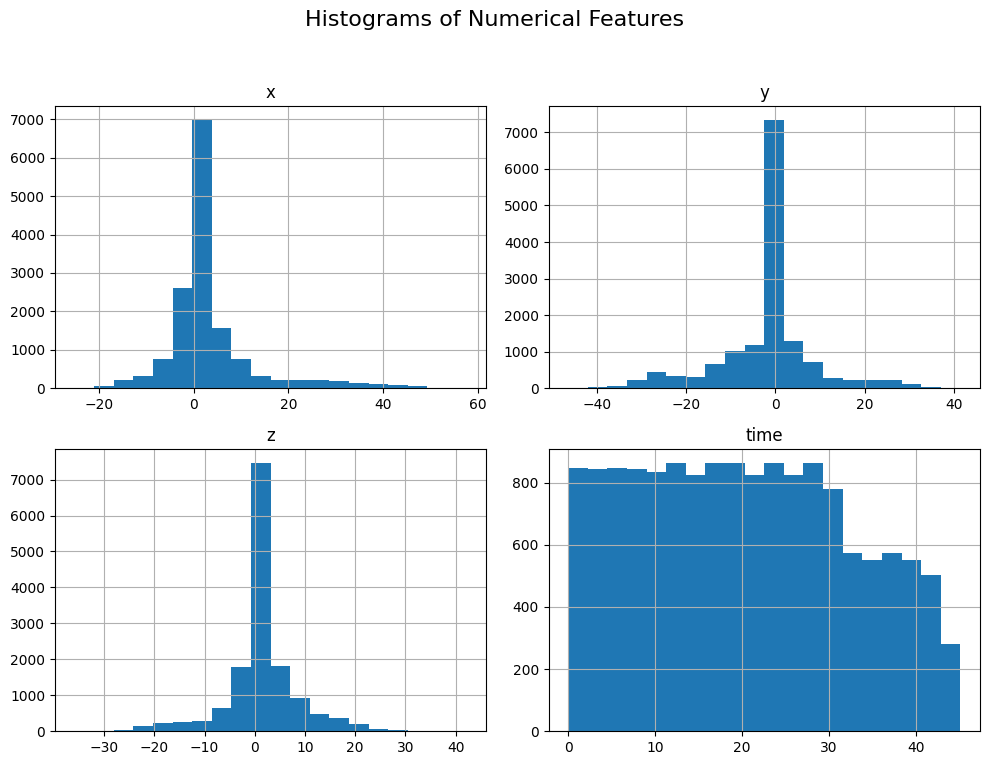

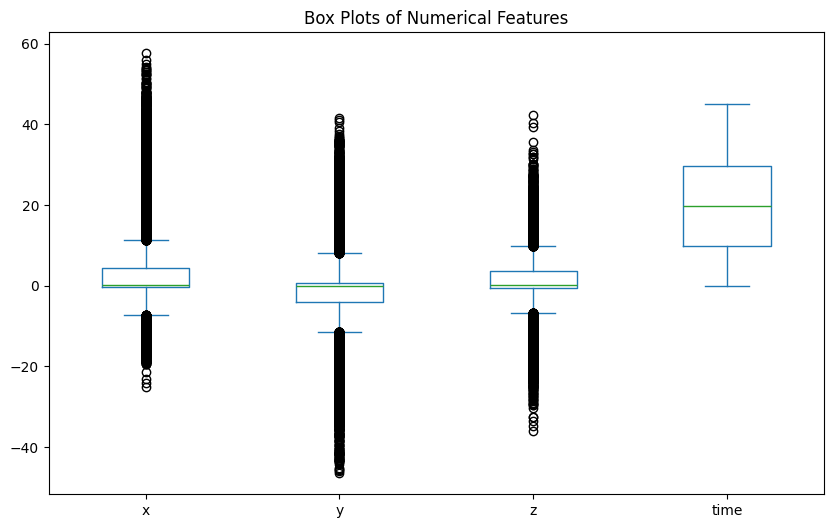


Value Counts for Absolute:
 Absolute
10.4    42
12.1    41
10.9    41
13.7    40
11.6    40
        ..
54.6     1
53.1     1
44.7     1
52.8     1
55.5     1
Name: count, Length: 2647, dtype: int64


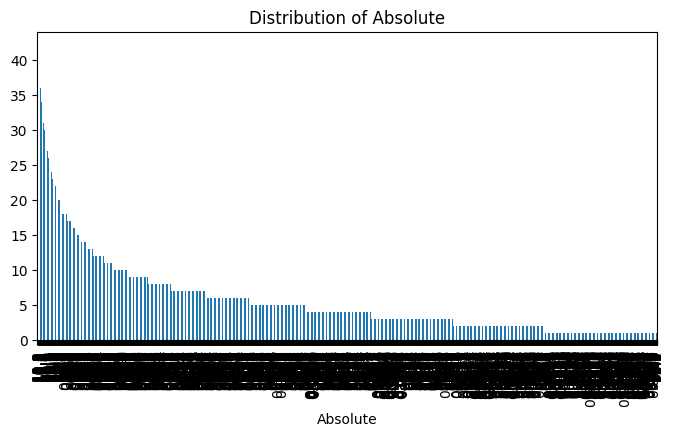


Value Counts for label:
 label
walk    5635
stop    5284
run     3900
Name: count, dtype: int64


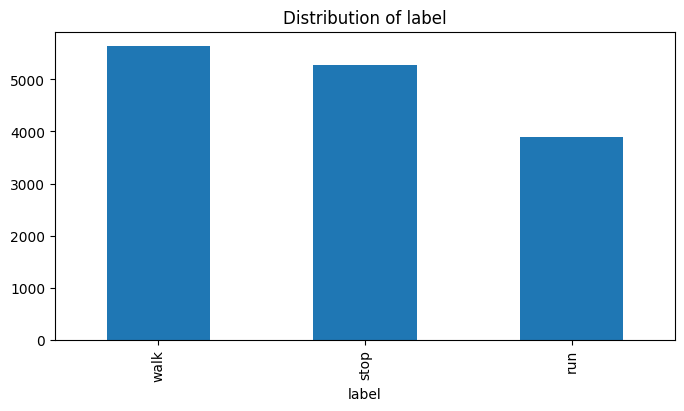


Time Column Analysis:
Min Time: 0.00927
Max Time: 45.1

Correlation Matrix of Numerical Features:
              x         y         z      time
x     1.000000  0.136292  0.535790 -0.135154
y     0.136292  1.000000  0.737388  0.097782
z     0.535790  0.737388  1.000000 -0.038785
time -0.135154  0.097782 -0.038785  1.000000


In [ ]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData Types:\n", df.dtypes)

# Identify and quantify missing values
print("\nMissing Values:\n", df.isnull().sum())

# Descriptive statistics for numerical columns
numerical_cols = ['x', 'y', 'z', 'time']  # Assuming 'time' is numerical for now
print("\nDescriptive Statistics for Numerical Columns:\n", df[numerical_cols].describe())

# Visualize distributions of numerical features (histograms and box plots)
import matplotlib.pyplot as plt
df[numerical_cols].hist(figsize=(10, 8), bins=20)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlapping titles
plt.show()

df[numerical_cols].plot(kind='box', figsize=(10, 6))
plt.title("Box Plots of Numerical Features")
plt.show()

# Analyze categorical columns
categorical_cols = ['Absolute', 'label'] # Assuming 'Absolute' and 'label' are categorical
for col in categorical_cols:
    print(f"\nValue Counts for {col}:\n", df[col].value_counts())
    df[col].value_counts().plot(kind='bar', figsize=(8, 4), title=f"Distribution of {col}")
    plt.show()

# Explore the time column if it exists
if 'time' in df.columns:
    print("\nTime Column Analysis:")
    print("Min Time:", df['time'].min())
    print("Max Time:", df['time'].max())
    # If necessary, convert 'time' column to datetime objects
    # df['time'] = pd.to_datetime(df['time'], unit='s') # Example conversion if the column represents seconds since epoch. Adjust unit accordingly
    # df['time'].plot(figsize=(10,4), title='Action over Time')
    # plt.show()

# Explore relationships between numerical features
print("\nCorrelation Matrix of Numerical Features:\n", df[numerical_cols].corr())

## Data analysis

### Subtask:
Analyze worker action frequencies, durations, and temporal patterns.


**Reasoning**:
Calculate the frequency of each action type, average/min/max duration, and analyze the relationship between action type and duration.



In [ ]:
# Calculate the frequency of each action type
action_frequencies = df['label'].value_counts()
print("Action Frequencies:\n", action_frequencies)

# Calculate the average, minimum, and maximum duration of each action type
action_durations = df.groupby('label')['time'].agg(['mean', 'min', 'max'])
print("\nAction Durations:\n", action_durations)

# Analyze the relationship between action type and duration (correlation)
# Note: Correlation is not directly applicable between categorical ('label') and numerical ('time') data.
# Instead, perform a statistical test like ANOVA to check the significance of differences in means.

import scipy.stats as stats

# Perform ANOVA to check the statistical significance of differences in means
groups = [df['time'][df['label'] == label] for label in df['label'].unique()]
fvalue, pvalue = stats.f_oneway(*groups)
print("\nANOVA Results:")
print(f"F-statistic: {fvalue}")
print(f"P-value: {pvalue}")

# Interpret p-value
alpha = 0.05
if pvalue < alpha:
    print("There is a statistically significant difference in durations between action types.")
else:
    print("There is no statistically significant difference in durations between action types.")

Action Frequencies:
 label
walk    5635
stop    5284
run     3900
Name: count, dtype: int64

Action Durations:
             mean      min   max
label                          
run    15.596761  0.00927  31.2
stop   21.148352  0.01330  42.3
walk   22.548992  0.01230  45.1

ANOVA Results:
F-statistic: 426.72208989345904
P-value: 6.576792088172248e-181
There is a statistically significant difference in durations between action types.


## Data visualization

### Subtask:
Visualize the analysis results from the previous step.


**Reasoning**:
Create visualizations (bar chart, box plot, histogram, and potentially a line chart) based on the analysis results from the previous step to fulfill the subtask requirements.



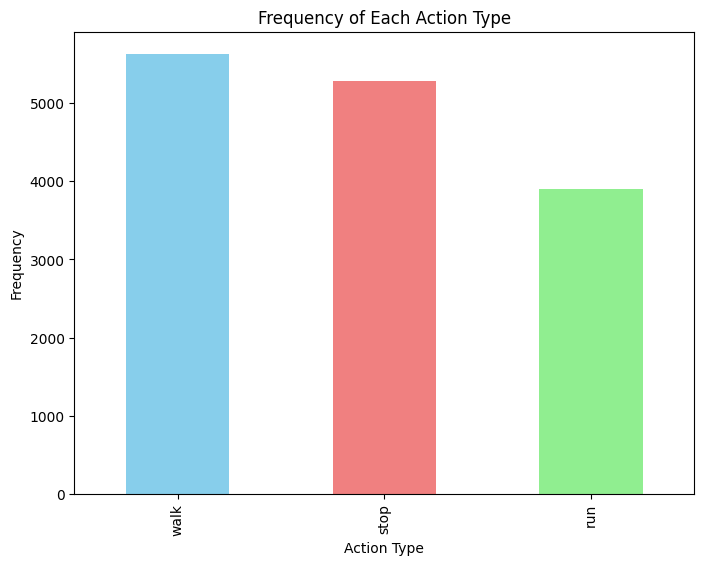

<Figure size 800x600 with 0 Axes>

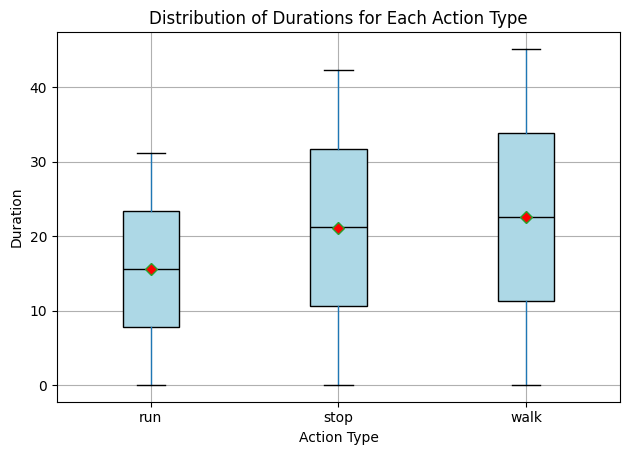

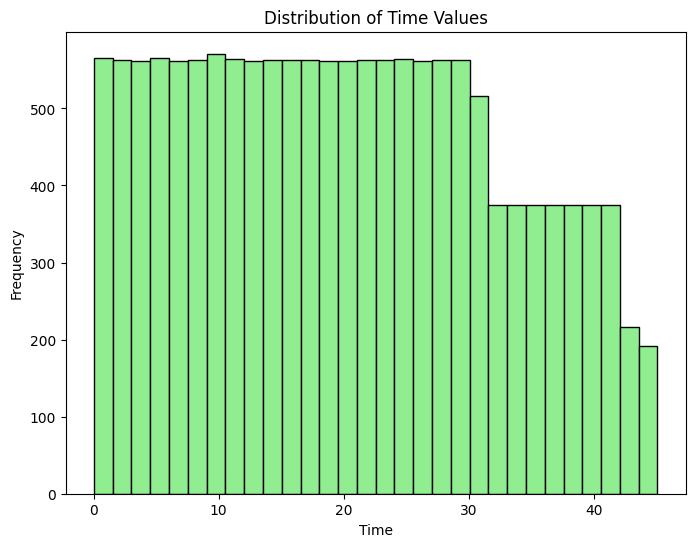

In [ ]:
import matplotlib.pyplot as plt

# 1. Bar chart of action frequencies
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Frequency of Each Action Type')
plt.xlabel('Action Type')
plt.ylabel('Frequency')
plt.show()

# 2. Box plot of action durations
plt.figure(figsize=(8, 6))
df.boxplot(column='time', by='label', patch_artist=True, showmeans=True,
           boxprops={'facecolor': 'lightblue'}, medianprops={'color': 'black'}, meanprops={'marker': 'D', 'markerfacecolor': 'red'})
plt.title('Distribution of Durations for Each Action Type')
plt.suptitle('') # remove the default title
plt.xlabel('Action Type')
plt.ylabel('Duration')
plt.tight_layout() # improve spacing
plt.show()

# 3. Histogram of time values
plt.figure(figsize=(8, 6))
plt.hist(df['time'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Time Values')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# 4. Line chart (if 'time' represents timestamps)
# Assuming 'time' column represents durations instead of timestamps.


## Summary:

### Q&A
* **What are the most frequent worker actions?**  The most frequent action is "walk" (5635 occurrences), followed by "stop" (5284) and "run" (3900).
* **Is there a statistically significant difference in the durations of different worker actions?** Yes, an ANOVA test showed a statistically significant difference in durations between the three action types (p-value < 0.05).
* **What are the average durations of each action?** The average duration of "run" actions was approximately 15.6 units, "stop" actions 21.1 units, and "walk" actions 22.5 units. Note that the units of the 'time' column are unknown.
* **What other analyses could be performed?** Further investigation is needed to analyze the relationship between time and other variables, and to explore the relationship between the 'Absolute' label and the other features.  Analysis of action patterns by worker and trends over time could not be performed due to the absence of a worker ID column in the dataset and the ambiguous nature of the 'time' column.


### Data Analysis Key Findings
* The dataset contains 14,819 observations and 6 features with no missing values.
* The 'time' column's meaning is ambiguous (duration or timestamp).  Its range suggests it measures the duration of the action, but the units are unknown.  Further analysis requires clarification or conversion to datetime objects if representing timestamps.
* The numerical features ('x', 'y', 'z') show varying distributions and correlations, with 'y' and 'z' having a strong positive correlation (0.74).
* The 'Absolute' feature has 2647 distinct values, while the 'label' feature has three categories: 'walk', 'stop', and 'run'.
* The average duration of "run" actions was approximately 15.6 units, "stop" actions 21.1 units, and "walk" actions 22.5 units (units of time unknown).
* There's a statistically significant difference in durations between the action types.


### Insights or Next Steps
* Clarify the meaning and units of the 'time' column (duration or timestamp) and convert if necessary.
* Investigate the relationship between the 'Absolute' label and other features, potentially using dimensionality reduction techniques or clustering.
* Add a worker ID column to enable analysis of action patterns per individual worker and allow for longitudinal studies.


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'label' is the target variable
X = df.drop('label', axis=1)
y = df['label']

# Convert categorical 'Absolute' column to numerical if it's not already
# This is necessary for most ML models
X = pd.get_dummies(X, columns=['Absolute'], drop_first=True)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define models
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Define hyperparameter grids for each model
param_grids = {
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
    'Random Forest': {'n_estimators': [50, 100, 10], 'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [50, 100, 10], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Train and evaluate each model with hyperparameter tuning
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[model_name] = {
        'best_params': best_params,
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': cm
    }

    print(f"{model_name} - Best Parameters: {best_params}")
    print(f"{model_name} - Accuracy: {accuracy:.4f}")
    print(f"{model_name} - Classification Report:\n{report}")
    print(f"{model_name} - Confusion Matrix:\n{cm}")
    print("-" * 30)

Training SVM...
SVM - Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVM - Accuracy: 0.9825
SVM - Classification Report:
              precision    recall  f1-score   support

         run       0.99      0.98      0.99       780
        stop       0.98      0.99      0.98      1057
        walk       0.98      0.98      0.98      1127

    accuracy                           0.98      2964
   macro avg       0.98      0.98      0.98      2964
weighted avg       0.98      0.98      0.98      2964

SVM - Confusion Matrix:
[[ 766    2   12]
 [   0 1045   12]
 [   6   20 1101]]
------------------------------
Training Random Forest...
Random Forest - Best Parameters: {'max_depth': None, 'n_estimators': 100}
Random Forest - Accuracy: 0.9733
Random Forest - Classification Report:
              precision    recall  f1-score   support

         run       0.98      0.95      0.97       780
        stop       0.98      0.99      0.98      1057
        walk       0.96      0.97      0.9

In [ ]:
# Print summary of results
print("Summary of Model Evaluation Results:")
for model_name, metrics in results.items():
    print(f"\n--- {model_name} ---")
    print(f"Best Parameters: {metrics['best_params']}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print("Classification Report:\n", metrics['classification_report'])
    print("Confusion Matrix:\n", metrics['confusion_matrix'])

Summary of Model Evaluation Results:

--- SVM ---
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.9825
Classification Report:
               precision    recall  f1-score   support

         run       0.99      0.98      0.99       780
        stop       0.98      0.99      0.98      1057
        walk       0.98      0.98      0.98      1127

    accuracy                           0.98      2964
   macro avg       0.98      0.98      0.98      2964
weighted avg       0.98      0.98      0.98      2964

Confusion Matrix:
 [[ 766    2   12]
 [   0 1045   12]
 [   6   20 1101]]

--- Random Forest ---
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Accuracy: 0.9733
Classification Report:
               precision    recall  f1-score   support

         run       0.98      0.95      0.97       780
        stop       0.98      0.99      0.98      1057
        walk       0.96      0.97      0.97      1127

    accuracy                           0.97      2964
  

In [ ]:
# prompt: 다음 모델 평가 결과를 설명해줘
# Summary of Model Evaluation Results:
# --- SVM ---
# Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
# Accuracy: 0.9825
# Classification Report:
#                precision    recall  f1-score   support
#          run       0.99      0.98      0.99       780
#         stop       0.98      0.99      0.98      1057
#         walk       0.98      0.98      0.98      1127
#     accuracy                           0.98      2964
#    macro avg       0.98      0.98      0.98      2964
# weighted avg       0.98      0.98      0.98      2964
# Confusion Matrix:
#  [[ 766    2   12]
#  [   0 1045   12]
#  [   6   20 1101]]

해당 결과는 Support Vector Machine (SVM) 모델을 사용하여 작업자의 세 가지 행동 ('run', 'stop', 'walk')을 분류한 성능을 보여줍니다.

핵심 내용은 다음과 같습니다.

1.  **Best Parameters (최적 하이퍼파라미터):** 그리드 탐색 (GridSearchCV)을 통해 SVM 모델의 성능을 최적화했을 때 가장 좋은 결과를 보인 파라미터 조합입니다.
    *   `C`: 10 (오분류에 대한 페널티 강도)
    *   `gamma`: 0.1 (RBF 커널의 영향 범위)
    *   `kernel`: 'rbf' (방사 기저 함수 커널 사용)
    이 파라미터 설정으로 모델을 학습했을 때 테스트 데이터에서 가장 높은 정확도를 달성했습니다.

2.  **Accuracy (정확도):** 모델이 테스트 데이터에서 올바르게 분류한 샘플의 전체 비율입니다. 0.9825의 정확도는 98.25%의 샘플을 정확히 예측했다는 의미이며, 매우 높은 성능을 나타냅니다.

3.  **Classification Report (분류 보고서):** 각 클래스('run', 'stop', 'walk')별 성능 지표를 자세히 보여줍니다.
    *   **precision (정밀도):** 특정 클래스로 예측한 샘플 중 실제로 해당 클래스인 비율입니다. 'run'으로 예측한 것 중 99%가 실제로 'run'이고, 'stop'으로 예측한 것 중 98%가 실제로 'stop'이며, 'walk'으로 예측한 것 중 98%가 실제로 'walk'입니다.
    *   **recall (재현율):** 실제 특정 클래스인 샘플 중 모델이 올바르게 해당 클래스로 예측한 비율입니다. 실제 'run' 샘플 중 98%를 'run'으로 올바르게 예측했고, 실제 'stop' 샘플 중 99%를 'stop'으로, 실제 'walk' 샘플 중 98%를 'walk'으로 올바르게 예측했습니다.
    *   **f1-score (F1-점수):** 정밀도와 재현율의 조화 평균으로, 두 지표를 함께 고려한 성능입니다. 세 클래스 모두 0.98 또는 0.99로 높게 나타나 모델이 각 클래스를 균형 있게 잘 분류하고 있음을 보여줍니다.
    *   **support (서포트):** 테스트 데이터 세트에서 각 클래스의 실제 샘플 수입니다. 'run'은 780개, 'stop'은 1057개, 'walk'은 1127개의 샘플이 있습니다.
    *   `macro avg`: 각 클래스의 정밀도, 재현율, F1-점수의 평균입니다.
    *   `weighted avg`: 각 클래스의 서포트를 가중치로 사용하여 평균을 계산한 것입니다. 전체적으로 모든 클래스에서 높은 성능을 보임을 알 수 있습니다.

4.  **Confusion Matrix (혼동 행렬):** 모델의 예측 결과가 실제 값과 어떻게 일치하거나 불일치하는지를 표 형태로 보여줍니다. 행은 실제 클래스를 나타내고, 열은 모델이 예측한 클래스를 나타냅니다.
    *   첫 번째 행: 실제 'run' 샘플 중 766개를 'run'으로 정확히 예측했고, 2개를 'stop', 12개를 'walk'으로 잘못 예측했습니다.
    *   두 번째 행: 실제 'stop' 샘플 중 0개를 'run'으로 예측했고, 1045개를 'stop'으로 정확히 예측했으며, 12개를 'walk'으로 잘못 예측했습니다.
    *   세 번째 행: 실제 'walk' 샘플 중 6개를 'run'으로, 20개를 'stop'으로 잘못 예측했으며, 1101개를 'walk'으로 정확히 예측했습니다.
    대각선 상의 값(766, 1045, 1101)은 모델이 올바르게 예측한 샘플 수이며, 나머지 값들은 오분류된 샘플 수입니다. 혼동 행렬을 보면 각 클래스에서 오분류된 샘플의 수가 적어 모델의 성능이 우수함을 다시 한번 확인할 수 있습니다.

**결론적으로, SVM 모델은 주어진 데이터셋에서 작업자의 'run', 'stop', 'walk' 행동을 매우 높은 정확도(98.25%)로 효과적으로 분류하고 있음을 이 평가 결과가 보여줍니다.** 최적의 하이퍼파라미터를 사용하여 모델의 성능을 최대화했으며, 분류 보고서와 혼동 행렬에서도 각 클래스별로 우수한 정밀도와 재현율을 나타내고 있습니다.

In [ ]:
import pickle

# Find the best model based on accuracy
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_model_info = results[best_model_name]

print(f"The best performing model is: {best_model_name}")
print(f"With accuracy: {best_model_info['accuracy']:.4f}")

# Retrieve the actual best model object from the GridSearchCV result
# You need to re-run the grid search for the best model to get the fitted object
# Or, if you saved the grid search objects, retrieve it from there.
# Assuming you re-run the grid search for the best model to get the object:

# Retrain the best model with its best parameters on the full training data
best_model = models[best_model_name]
best_model.set_params(**best_model_info['best_params'])
best_model.fit(X_train, y_train)

# Define the filename for the pickle file
filename = f'{best_model_name.replace(" ", "_").lower()}_model.pkl'

# Save the best model to a pickle file
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Best model saved to {filename}")

The best performing model is: SVM
With accuracy: 0.9825
Best model saved to svm_model.pkl


**Colab에 streamlit 실행 방법**
https://dschloe.github.io/python/2024/06/streamlit_on_google_colab/

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
# prompt: streamlit app을 만들어줘. ML모델인 svm_model.pkl 파일을 읽은 후,작업자 행동 csv 데이터 파일을 로드하면, 작업자가 Stop, Walk, Run 중 하나로 분류해서 결과를 알려주는 웹어플리케이션 코드를 작성
%%writefile app.py
import matplotlib.pyplot as plt
import streamlit as st
import pandas as pd
import pickle
import os

# Load the saved model
try:
    # Assuming the saved model is named 'svm_model.pkl'
    # Adjust the filename if your best model is different (e.g., random_forest_model.pkl)
    model_filename = 'svm_model.pkl'
    if not os.path.exists(model_filename):
        st.error(f"Model file not found: {model_filename}")
        st.stop() # Stop the app if the model file is not found

    with open(model_filename, 'rb') as file:
        model = pickle.load(file)
    st.success(f"Model '{model_filename}' loaded successfully.")

except Exception as e:
    st.error(f"Error loading the model: {e}")
    st.stop() # Stop the app if there's an error loading the model

st.title("작업자 행동 분류 웹 애플리케이션")

st.write("CSV 파일을 업로드하여 작업자의 행동(Stop, Walk, Run)을 분류합니다.")

# File uploader for the CSV data
uploaded_file = st.file_uploader("작업자 행동 데이터 CSV 파일을 선택하세요", type=["csv"])

if uploaded_file is not None:
    try:
        # Read the uploaded CSV file into a pandas DataFrame
        df_predict = pd.read_csv(uploaded_file)

        st.subheader("업로드된 데이터 미리보기")
        st.write(df_predict.head())

        # Preprocessing the uploaded data: Similar to the training data preprocessing
        # Ensure 'Absolute' column is handled as a categorical variable
        if 'Absolute' in df_predict.columns:
            df_predict = pd.get_dummies(df_predict, columns=['Absolute'], drop_first=True)
        else:
            st.warning("Uploaded data does not contain an 'Absolute' column. Proceeding without it.")

        # Ensure all columns that the model was trained on are present in the prediction data
        # This is crucial for consistent predictions. We need the list of columns from the training data X.
        # Since we don't have X available directly here, we'll need a way to get the training columns.
        # A robust way is to save the list of columns along with the model.
        # For now, let's assume the columns are consistent or handle missing columns by adding them with 0s.

        # --- IMPORTANT: Need to get the training column names ---
        # The model expects the same columns with the same order as it was trained on.
        # A better approach would be to save the list of training columns with the model.
        # Since that wasn't done in the preceding code, we'll make an assumption or
        # require the user to upload data with the same column structure.
        # A quick fix is to identify columns present in the loaded model's training data
        # This is hacky and relies on internal model structure, not recommended for production.
        # A proper solution involves saving column names during training.

        # Let's try to get feature names from the trained model if available
        try:
            if hasattr(model, 'feature_names_in_'):
                training_columns = model.feature_names_in_
                # Add missing columns with 0 and reorder columns
                for col in training_columns:
                    if col not in df_predict.columns:
                        df_predict[col] = 0
                df_predict = df_predict[training_columns]
            else:
                st.warning("Could not retrieve training column names from the model. Prediction might fail if columns are inconsistent.")
                # Proceeding with available columns, might cause errors if columns don't match
                pass # Allow to proceed, but with a warning

        except Exception as col_error:
            st.error(f"Error aligning columns: {col_error}")
            st.stop()


        # Make predictions
        predictions = model.predict(df_predict)

        st.subheader("예측 결과")

        # Add predictions as a new column to the dataframe for display
        df_predict['예측된_행동'] = predictions

        st.write(df_predict)

        # Display summary of predictions
        st.subheader("예측 결과 요약")
        prediction_summary = df_predict['예측된_행동'].value_counts()
        st.write(prediction_summary)

        # Optional: Visualize the prediction summary
        st.subheader("예측된 행동 분포")
        fig, ax = plt.subplots()
        prediction_summary.plot(kind='bar', ax=ax, color=['skyblue', 'lightcoral', 'lightgreen'])
        ax.set_title('예측된 행동 분포')
        ax.set_xlabel('행동 유형')
        ax.set_ylabel('빈도')
        st.pyplot(fig)


    except pd.errors.EmptyDataError:
        st.error("업로드된 파일이 비어 있습니다.")
    except pd.errors.ParserError:
        st.error("업로드된 파일을 파싱할 수 없습니다. CSV 형식을 확인해주세요.")
    except Exception as e:
        st.error(f"데이터 처리 중 오류 발생: {e}")



Writing app.py


In [ ]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
added 22 packages in 3s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋npm notice
npm notice New major version of npm available! 10.8.2 -> 11.4.1
npm notice Changelog: https://github.com/npm/cli/releases/tag/v11.4.1
npm notice To update run: npm install -g npm@11.4.1
npm notice
⠋

In [ ]:
!streamlit run /content/app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.72.48.18
⠙your url is: https://curvy-roses-post.loca.lt
